In [1]:
from pathlib import Path
from typing import List
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import load_data as ld
import matplotlib.pyplot as plt

In [10]:
# Init
sns.set()
sns.set(rc={'figure.figsize':(30,16)})
sns.set(font_scale=5)
workloads: Path = Path("../data/workloads/")

def plot_stacked(data: DataFrame, x: str, y: str, hue: str, hue_order: List[str]=None):
    df_plottable: DataFrame = data.groupby([x, hue])[y].sum().reset_index().pivot(columns=hue, index=x, values=y)
    if hue_order:
        assert sorted(hue_order) == sorted(list(df_plottable))
        df_plottable = df_plottable[hue_order]
    df_plottable.plot(kind="bar", stacked=True)
    plt.ylabel(y)

def plot_workload(workload_folder: Path):
    df = ld.get_workload_data(workload_folder)
    df["mean"] = [sum / count for sum,count in zip(df["Time (in ns)"], df["count"])]
    order: List[str] = ["TABLE_SCAN", "JOIN", "AGGREGATE", "PROJECTION"]
    order_filtered = [operator for operator in order if operator in list(df["OPERATOR_TYPE"])]
    plot_stacked(data=df, x="Data Type", y="Time (in ns)", hue="OPERATOR_TYPE", hue_order=order_filtered)

Processing table_scans
Processing projections
Processing aggregates
Processing joins


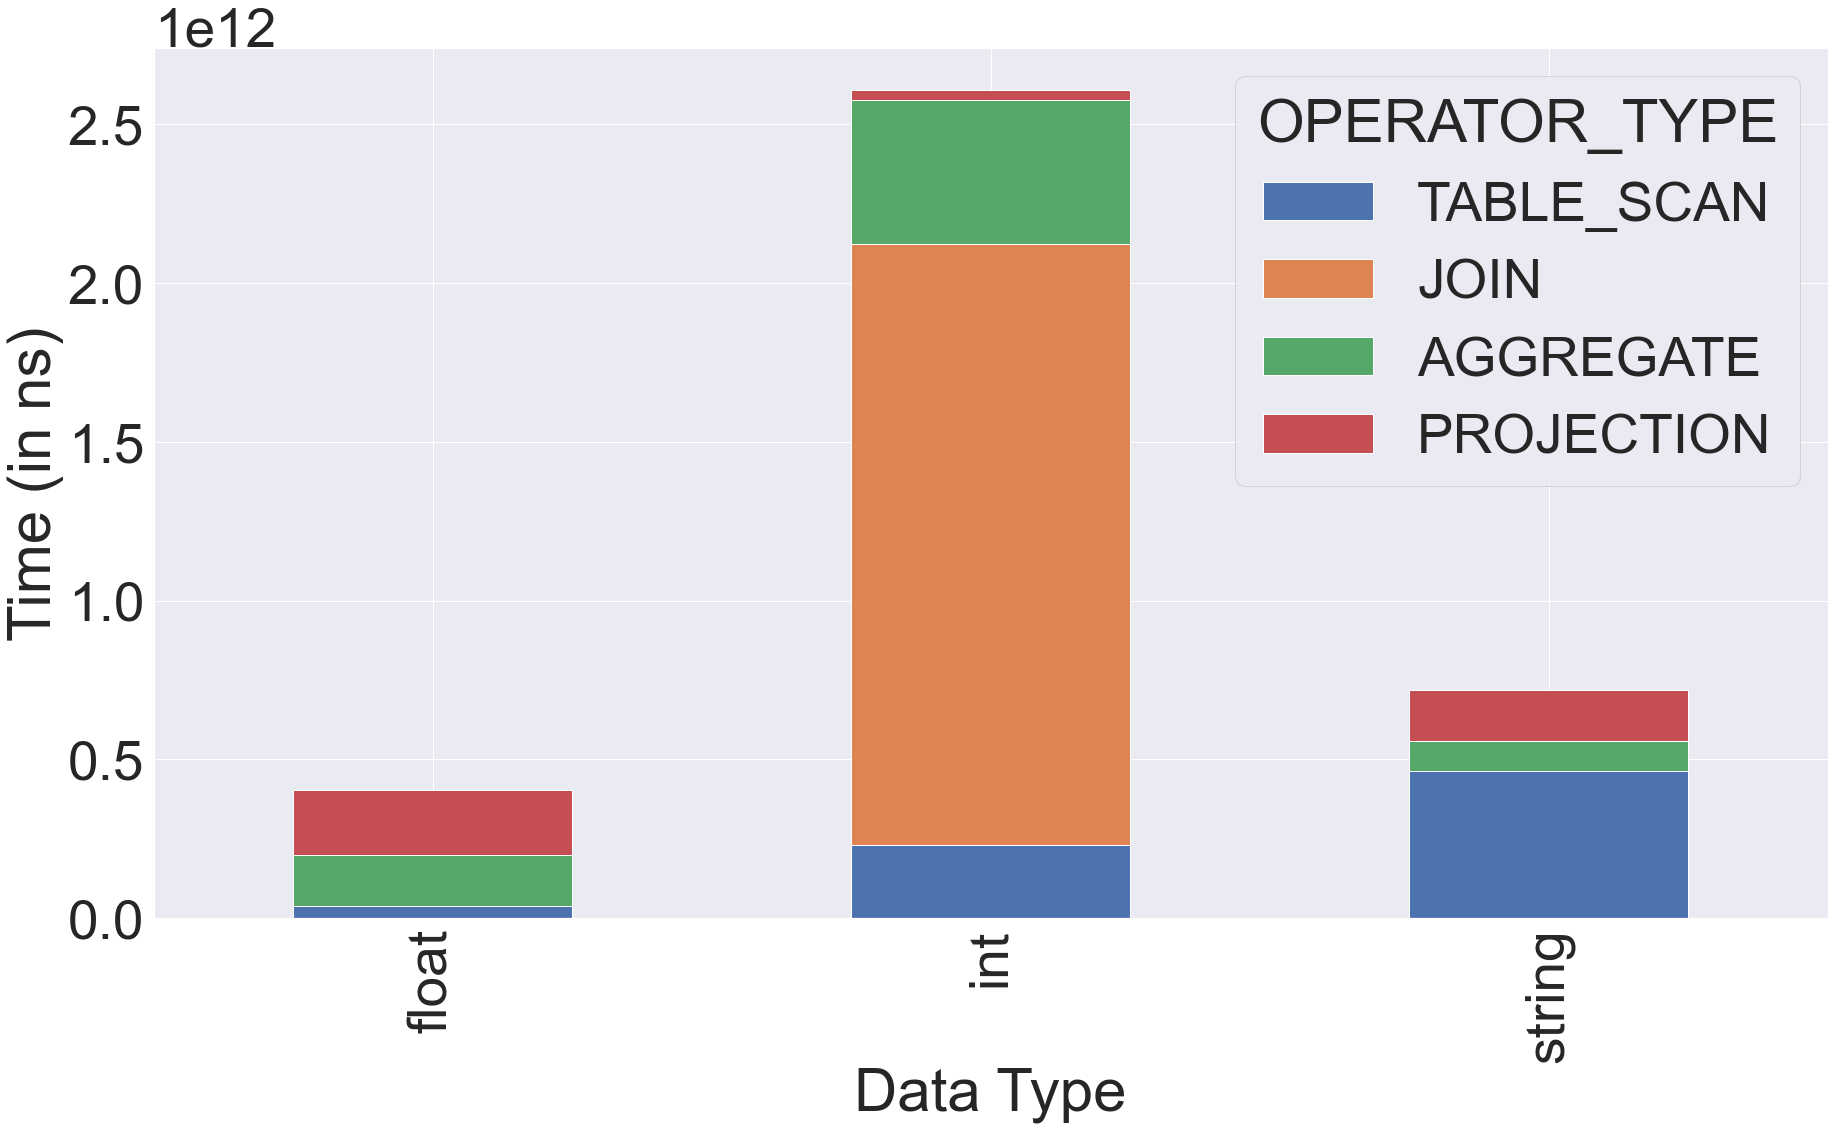

In [11]:
test = plot_workload(workloads / "TPC-H")
plt.savefig("visualizations/tpch-workload.png")

Processing table_scans
Processing projections
Processing aggregates
Processing joins


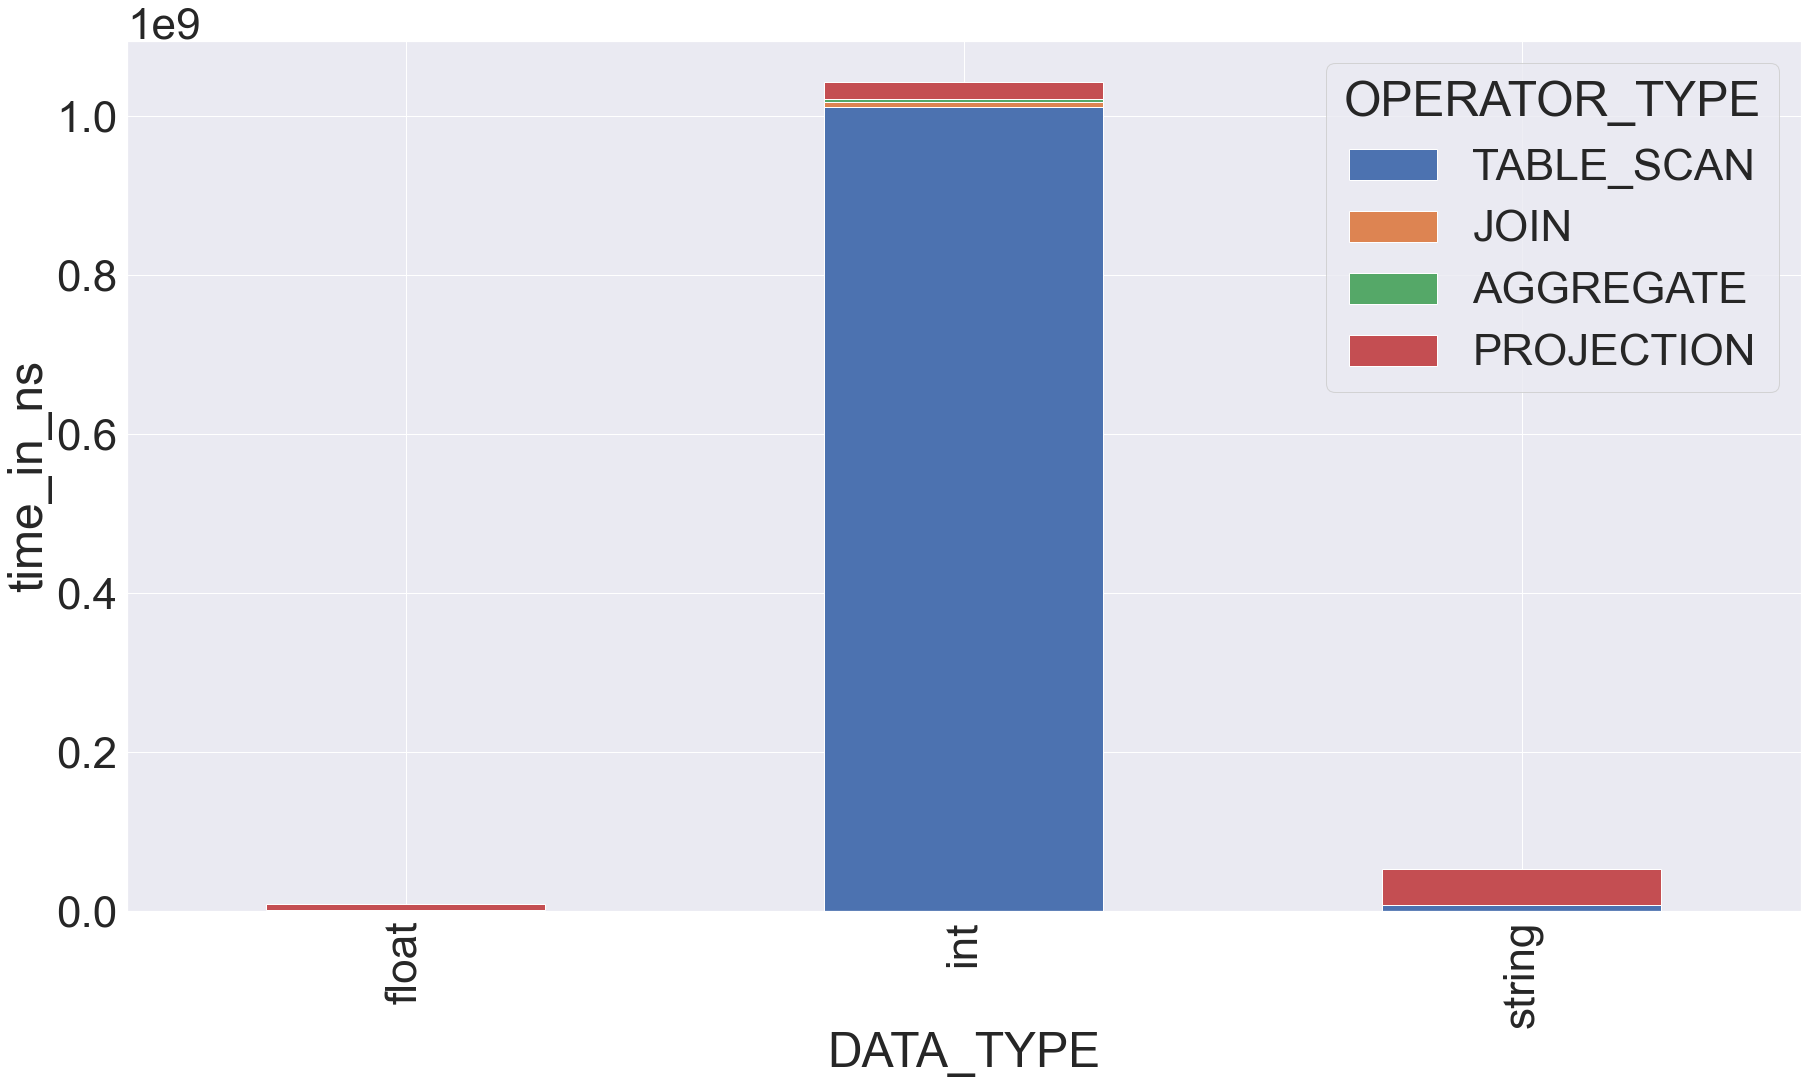

In [4]:
plot_workload(workloads / "TPC-C")

Processing table_scans
Processing projections
Processing aggregates
Processing joins


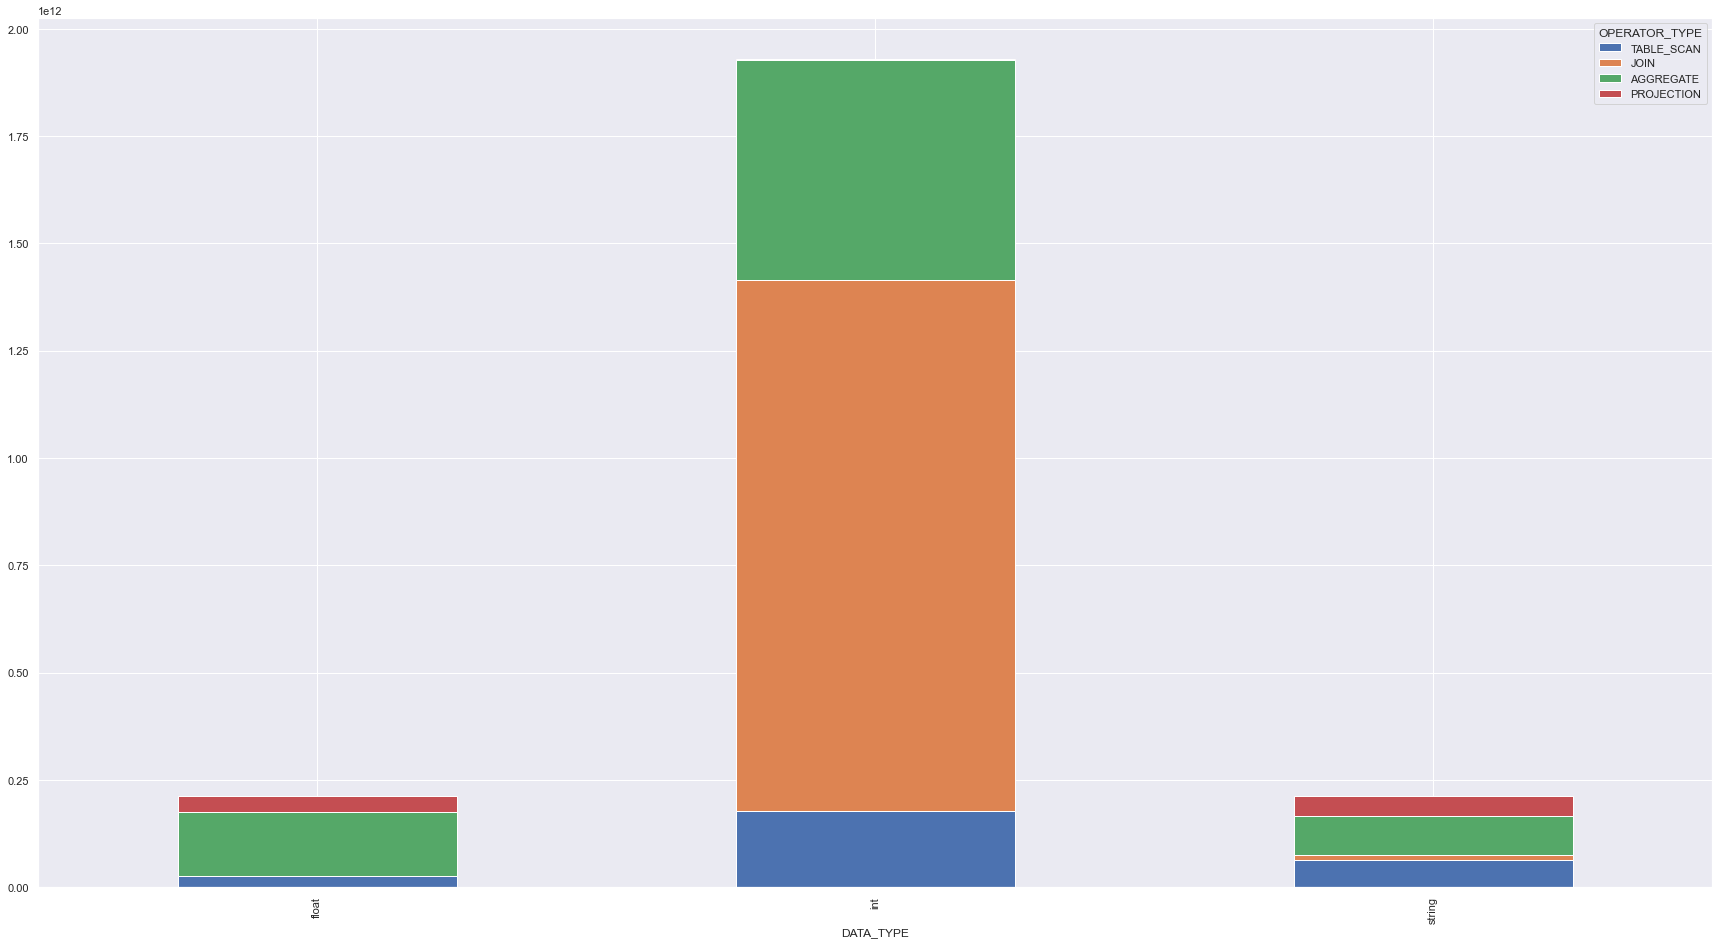

In [5]:
plot_workload(workloads / "TPC-DS")

Processing table_scans
Processing projections
Processing aggregates
Processing joins


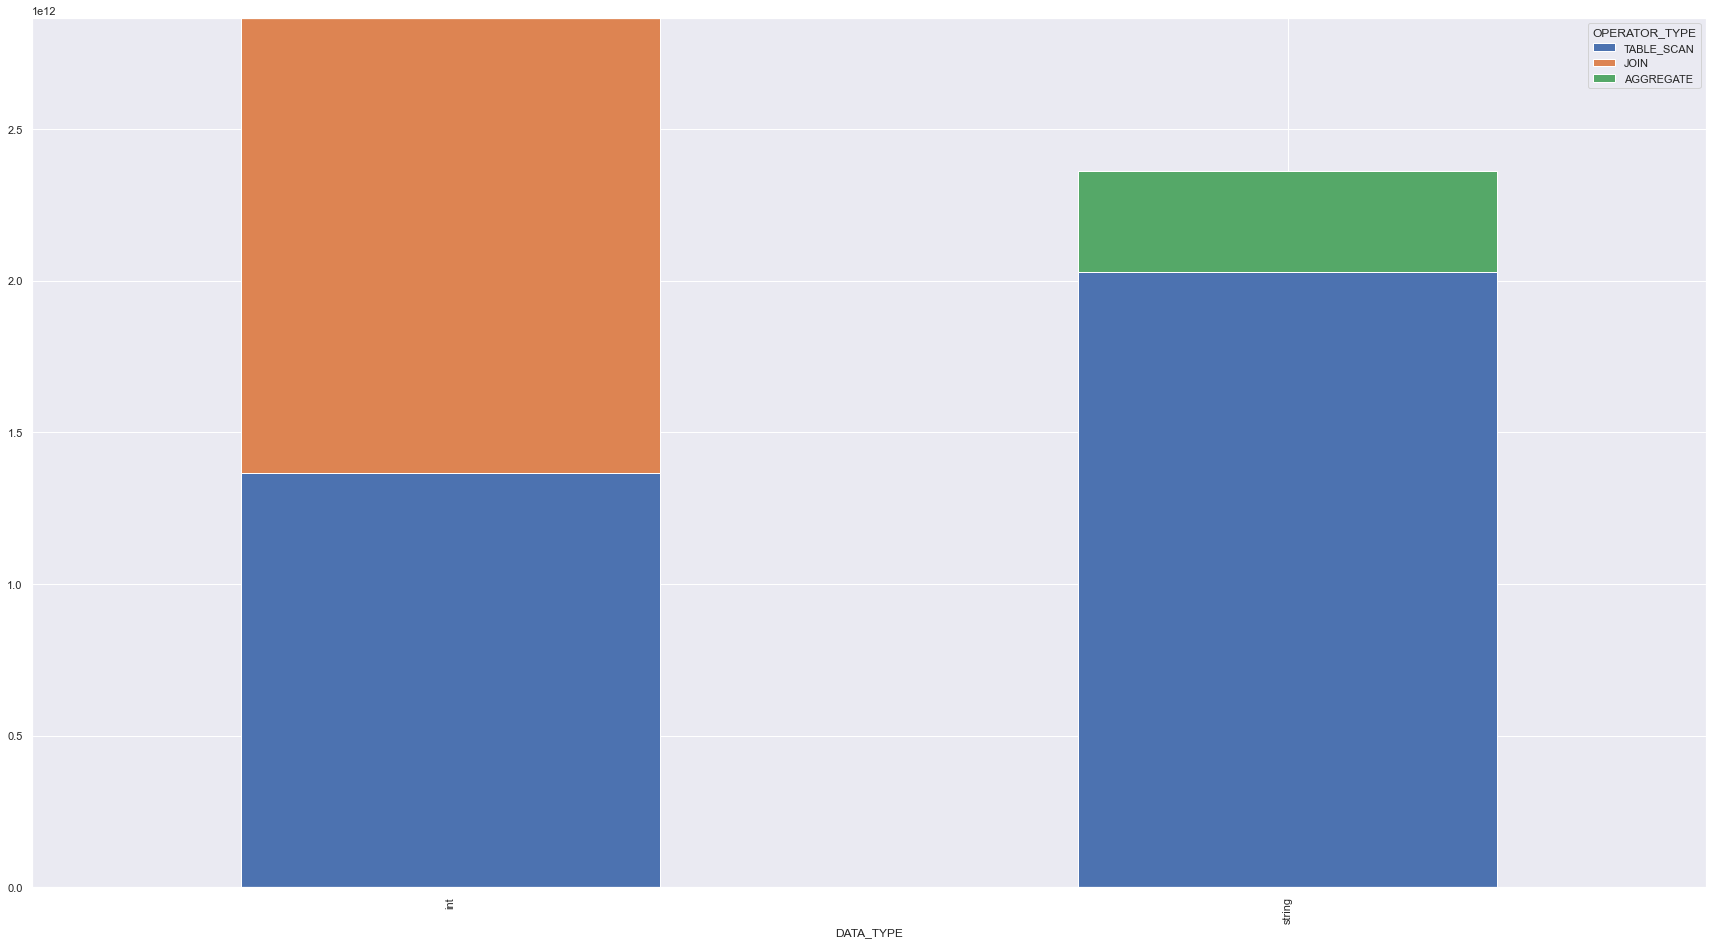

In [6]:
plot_workload(workloads / "Join Order Benchmark")

Processing table_scans
Processing projections
Processing aggregates
Processing joins


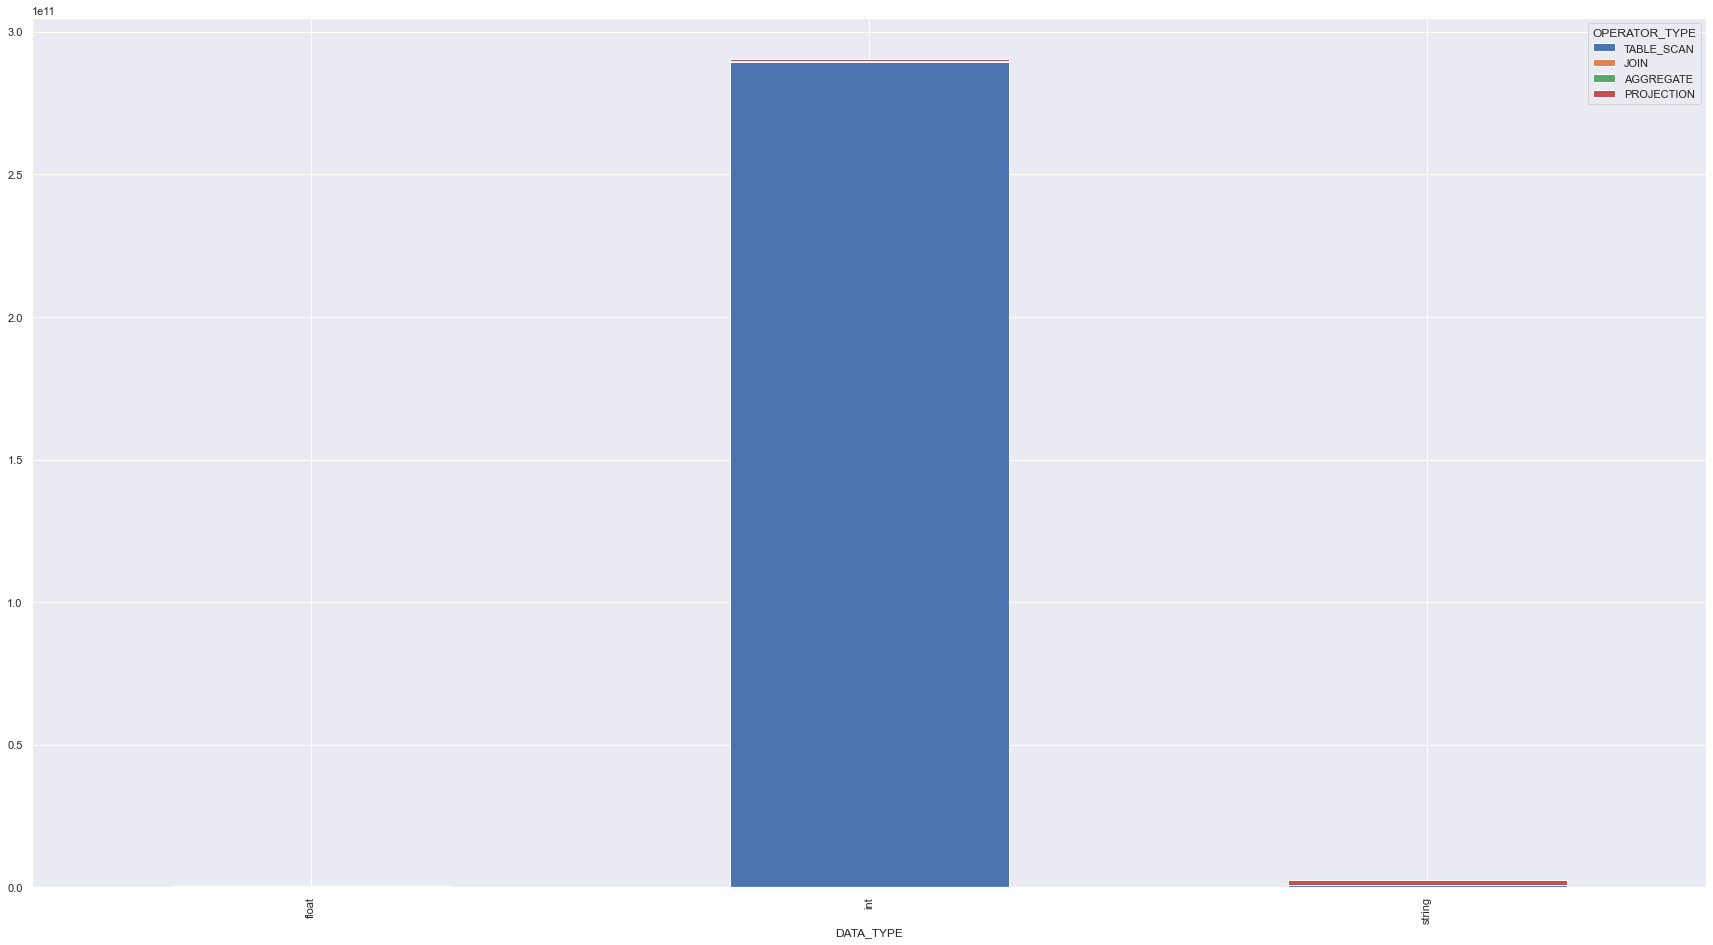

In [7]:
plot_workload(workloads / "CH-benCHmark")

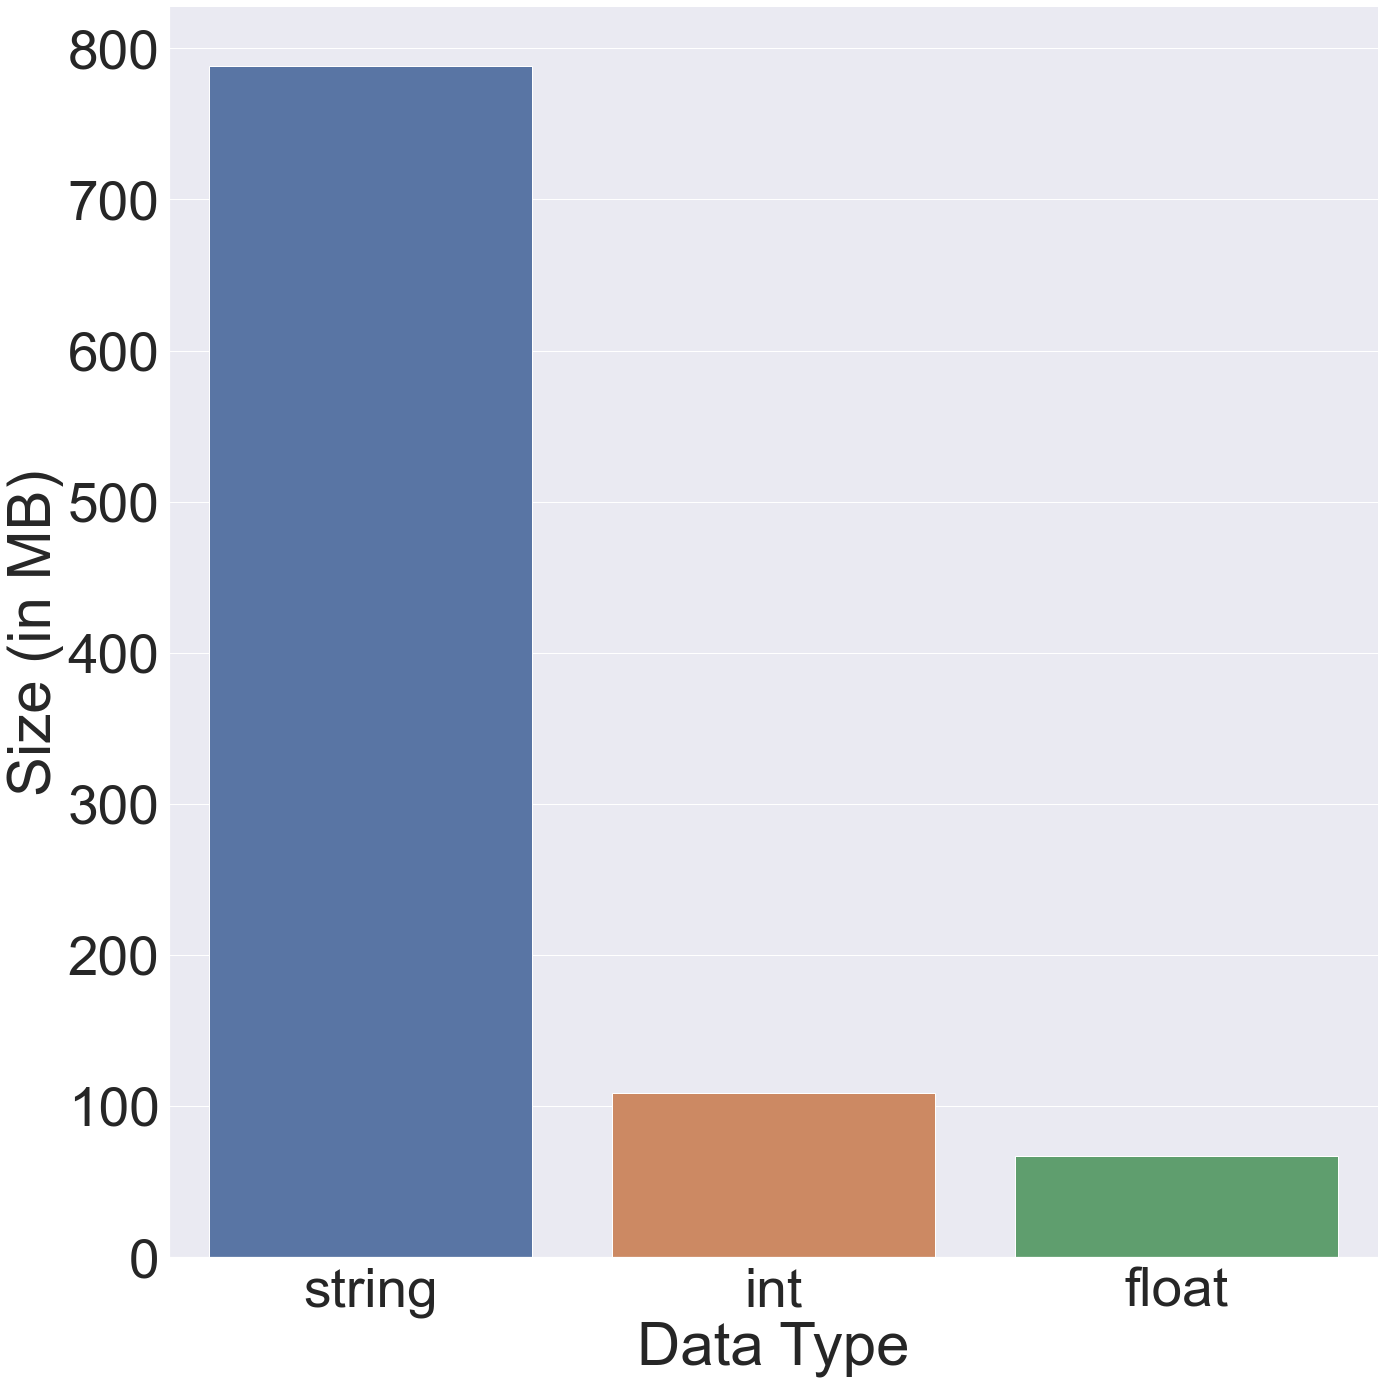

In [14]:
data: DataFrame = DataFrame()
data["Data Type"] = ["string", "int", "float"]
data["Size (in MB)"] = [788, 109, 67]
sns.catplot(data=data, x="Data Type", y="Size (in MB)", kind="bar", height=20)
plt.savefig("visualizations/tpch_data_type_sizes.png")